<a href="https://colab.research.google.com/github/SajalSinha/Bike_sharing_demand/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Downloading Libraries  

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Uploading Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/SajalSinha/Bike_sharing_demand/main/SeoulBikeData.csv',encoding = 'unicode_escape',date_parser='Date')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#Analyzing and cleaning Data

In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,27/10/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#EDA

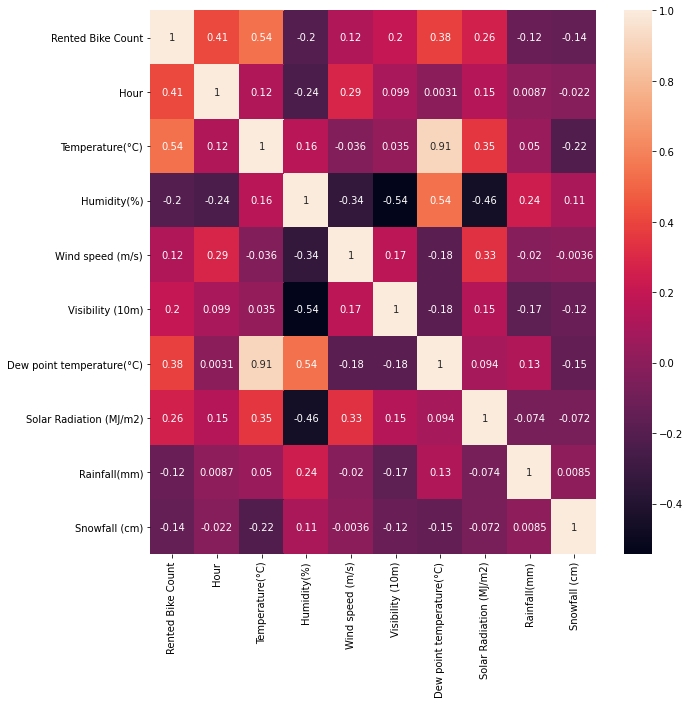

In [10]:
 plt.figure(figsize=(10,10))
 sns.heatmap(df.corr(), annot=True)

Correlation between different variables are shown using heatmap. So, in-order to see if any multi-collinearity exist, we use correlation chart. Values which are close to **1** other than diagonal elements must be checked. In our case **Dew Point Temperature** and **Temperature** have correlation of *0.91* which can be due to the fact that as the mean temperature itself is low (12.882922 C) and dew temperature will be similarly low, so they both can be categorized as *directly propotional*

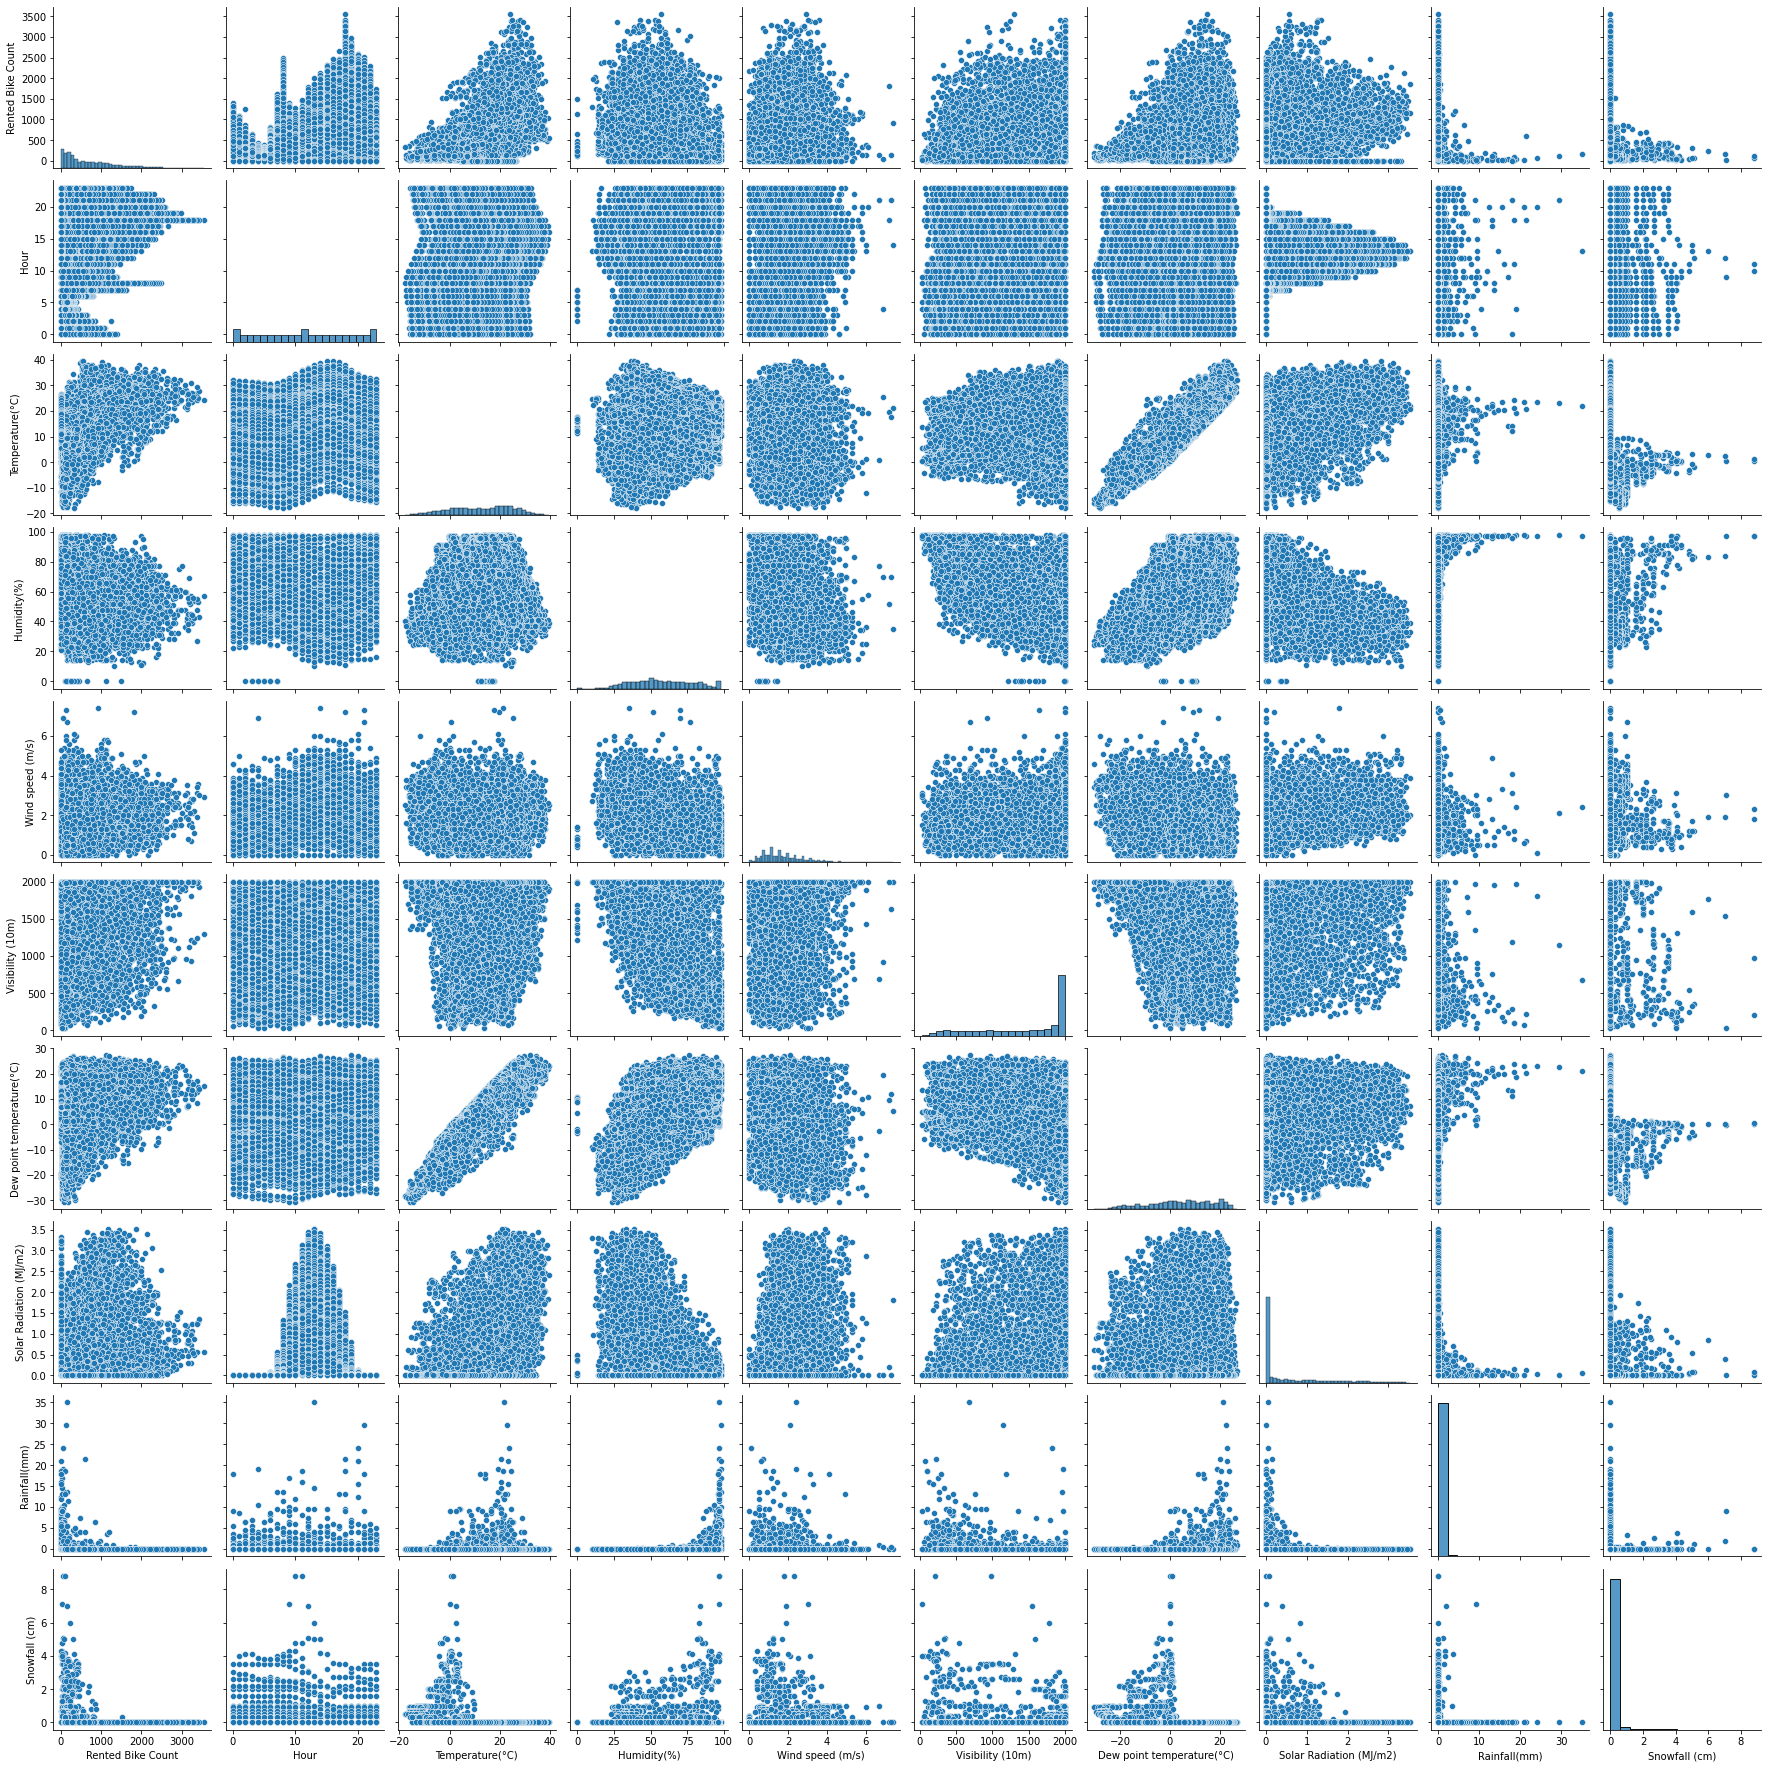

In [11]:
sns.pairplot(df)

Text(0.5, 1.0, 'Comparision of Bike Count with Dew Point Temperature')

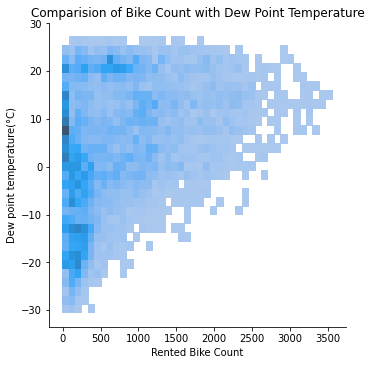

In [12]:
sns.displot(x=df['Rented Bike Count'],y=df['Dew point temperature(°C)'])
plt.title('Comparision of Bike Count with Dew Point Temperature')

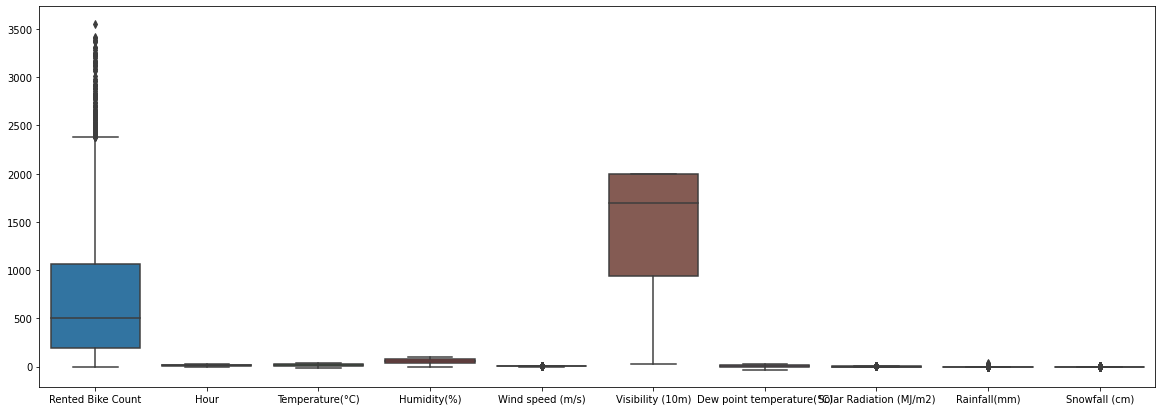

In [13]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

In [14]:
df[df['Rented Bike Count']>2500]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3282,16/04/2018,2692,18,17.0,28,3.1,2000,-1.6,0.88,0.0,0.0,Spring,No Holiday,Yes
3498,25/04/2018,2807,18,21.2,32,3.8,1927,3.8,0.94,0.0,0.0,Spring,No Holiday,Yes
3522,26/04/2018,2574,18,17.4,45,3.1,1092,5.3,0.75,0.0,0.0,Spring,No Holiday,Yes
3546,27/04/2018,2577,18,20.3,47,2.5,705,8.6,0.77,0.0,0.0,Spring,No Holiday,Yes
3618,30/04/2018,2558,18,23.0,54,2.9,679,13.1,0.81,0.0,0.0,Spring,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,16/10/2018,2716,18,16.9,47,1.4,1637,5.5,0.11,0.0,0.0,Autumn,No Holiday,Yes
7746,19/10/2018,2631,18,16.6,40,2.4,2000,2.9,0.11,0.0,0.0,Autumn,No Holiday,Yes
7818,22/10/2018,2613,18,17.3,43,0.9,783,4.5,0.08,0.0,0.0,Autumn,No Holiday,Yes
7866,24/10/2018,2612,18,15.1,53,1.7,2000,5.5,0.06,0.0,0.0,Autumn,No Holiday,Yes


In [15]:
df[df['Rented Bike Count']==0]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,09/11/2018,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


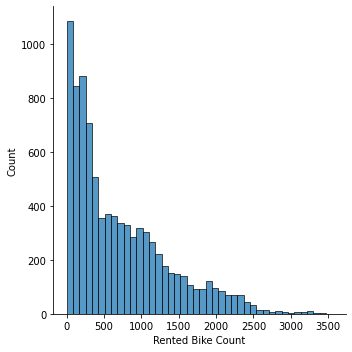

In [16]:
sns.displot(df['Rented Bike Count'])

The plot of Rented Bike Count shows right Skewness. So in order to remove it we will use different techniques like log transformation, square-root transformation.

In [17]:
x = df['Rented Bike Count']
x.skew()

1.1534281773679014

In [18]:
x = np.log(df['Rented Bike Count'])
x.skew()

nan

In [19]:
a = (np.sqrt(df['Rented Bike Count']))
a.skew()

0.237362090985412

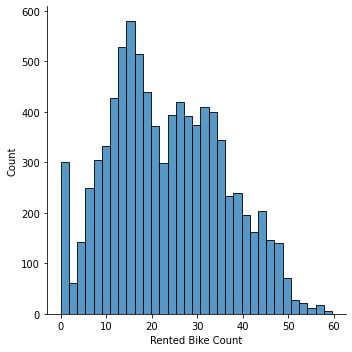

In [20]:
sns.displot(np.sqrt(df['Rented Bike Count']))

In [22]:
# from scipy import stats
# stats.boxcox((df['Rented Bike Count']))

Text(0.5, 1.0, 'Comparision of Bike Count with Temperature')

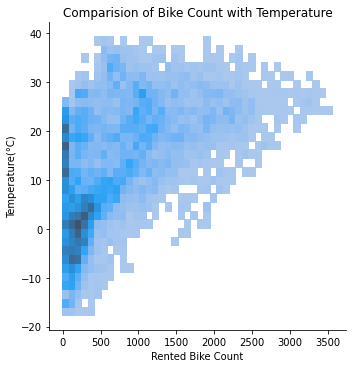

In [23]:
sns.displot(y=df['Temperature(°C)'],x=df['Rented Bike Count'])
plt.title('Comparision of Bike Count with Temperature')

From both the displot we can easily say **warmer the weather, more the count**

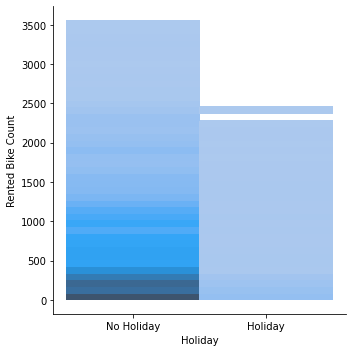

In [24]:
sns.displot(x=df['Holiday'],y=df['Rented Bike Count'])

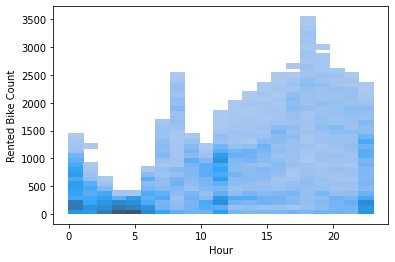

In [25]:
sns.histplot(y=df['Rented Bike Count'],x=df['Hour'])

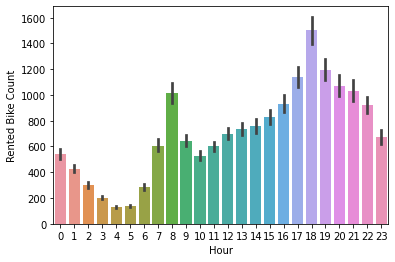

In [26]:
sns.barplot(x=df['Hour'],y=df['Rented Bike Count'])

**The Most busiest/preferable time of bike renting is 6pm (18:00) to 8 pm (20:00)**

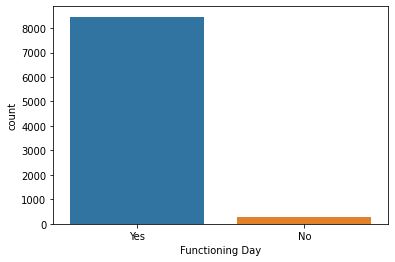

In [27]:
sns.countplot(df['Functioning Day']) 

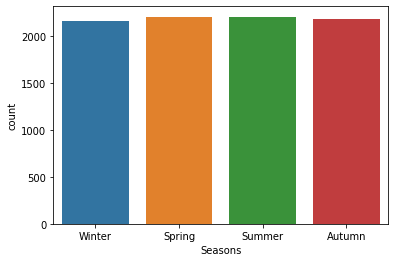

In [28]:
sns.countplot(df['Seasons'])

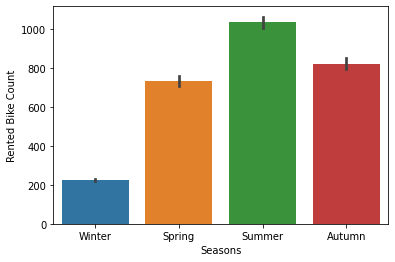

In [29]:
sns.barplot(x=df['Seasons'],y=df['Rented Bike Count'])

**Bikes are rented more during summer season**

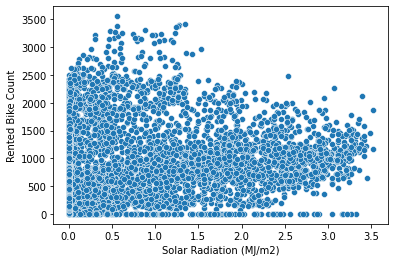

In [30]:
sns.scatterplot(x=df['Solar Radiation (MJ/m2)'],y=df['Rented Bike Count'])

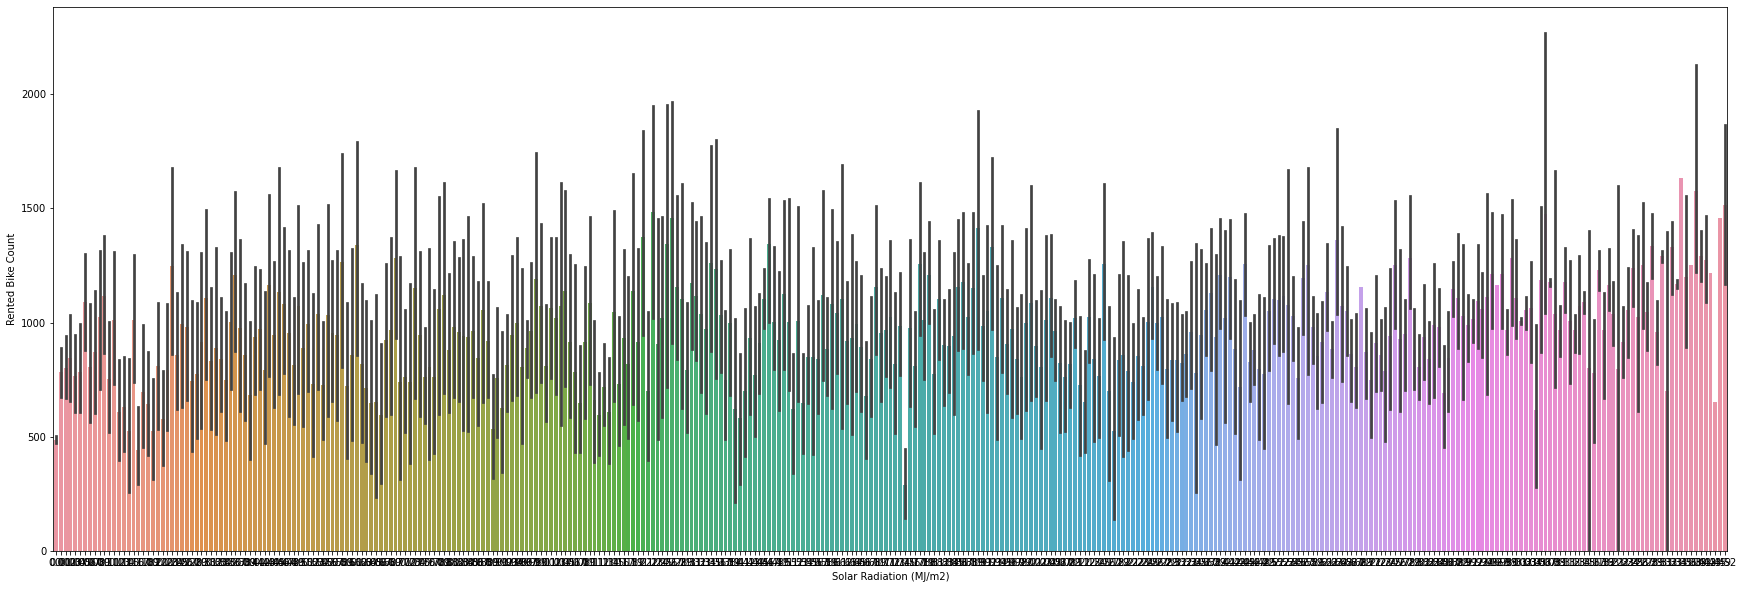

In [31]:
plt.figure(figsize=(30,10))
sns.barplot(x=df['Solar Radiation (MJ/m2)'],y=df['Rented Bike Count'])

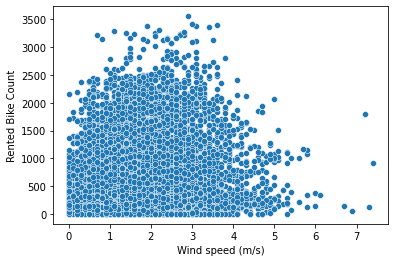

In [32]:
sns.scatterplot(x =df['Wind speed (m/s)'],y=df['Rented Bike Count'])

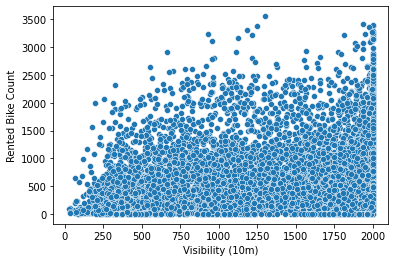

In [33]:
 sns.scatterplot(x =df['Visibility (10m)'],y=df['Rented Bike Count'])

#To Get Data Ready for model

In [34]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [35]:
# df.drop(['Solar Radiation (MJ/m2)'],axis=1,inplace=True)

In [36]:
# df['Rainfall(mm)'] = np.where(df['Rainfall(mm)']>=0,1,0)
# df['Snowfall (cm)'] = np.where(df['Snowfall (cm)']>=0,1,0)
# encoders_nums = {"Functioning Day":{"Yes":1,"No":0}}
# df = df.replace(encoders_nums)

In [37]:
# dummy = pd.get_dummies(df['Seasons'])
# dummy_1 = pd.get_dummies(df['Holiday'])
# df = pd.concat([df,dummy,dummy_1],axis=1)

In [38]:
# df.drop(['Seasons'],axis=1,inplace=True)

In [39]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [40]:
# df.drop(df['Holiday'],axis=1,inplace=True)

In [41]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [42]:
# import pandas as pd

# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)

In [43]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [44]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [45]:
encoders_nums = {"Functioning Day":{"Yes":1,"No":0}}
df = df.replace(encoders_nums)

##Spliting of Data

In [46]:
from scipy.stats import zscore
X = df[['Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)','Rainfall(mm)', 'Snowfall (cm)', 'Functioning Day']].apply(zscore) #'Autumn', 'Spring','Summer', 'Winter', 'No Holiday']]
y = np.sqrt(df['Rented Bike Count'])

In [47]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Functioning Day
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-0.1318,-0.171891,0.18668
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-0.1318,-0.171891,0.18668
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-0.1318,-0.171891,0.18668
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-0.1318,-0.171891,0.18668
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-0.1318,-0.171891,0.18668


In [48]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 8)
(1752, 8)


In [49]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1


#Feature selection

In [50]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE

# select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=10)
# select.fit(X_train,y_train)
# X_train_selected = select.transform(X_train)

# print("X_train.shape: {}".format(X_train.shape))
# print("X_train_selected.shape: {}".format(X_train_selected.shape))

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   int64

In [52]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [53]:
numeric_features = df[['Rented Bike Count', 'Hour', 'Temperature(°C)',
       'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)'
       ]]

In [54]:
from sklearn.model_selection import train_test_split
num_x_train,num_x_test,num_y_train,num_y_test = train_test_split(numeric_features.drop(labels='Rented Bike Count',axis=1),numeric_features['Rented Bike Count'],test_size=0.3,random_state=0)

In [55]:
num_y_train

5316    1035
5845     533
3586     787
3054     108
6805    1057
        ... 
4373     306
7891    1968
4859    1066
3264     401
2732     513
Name: Rented Bike Count, Length: 6132, dtype: int64

In [56]:
num_x_train.isnull().sum()

Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
dtype: int64

In [57]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(num_x_train,num_y_train)
mutual_info

array([0.35615786, 0.37397935, 0.09415012, 0.0375165 , 0.0455834 ,
       0.22697487, 0.16286591, 0.07073957, 0.0547514 ])

In [58]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = num_x_train.columns


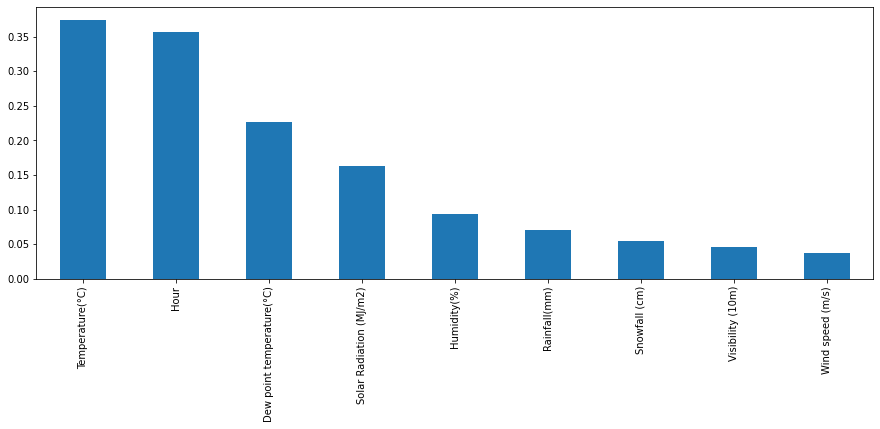

In [59]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [60]:
from sklearn.feature_selection import SelectPercentile
selected_top_cols = SelectPercentile(mutual_info_regression,percentile=20)
selected_top_cols.fit(num_x_train,num_y_train)
num_x_train.columns[selected_top_cols.get_support()]

Index(['Hour', 'Temperature(°C)'], dtype='object')

In [61]:
dummy = pd.get_dummies(df['Seasons'])
dummy_1 = pd.get_dummies(df['Holiday'])
df = pd.concat([df,dummy,dummy_1],axis=1)

In [62]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Autumn', 'Spring', 'Summer', 'Winter',
       'Holiday', 'No Holiday'],
      dtype='object')

In [63]:
cls_features = df[['Seasons', 'Holiday', 'Functioning Day', 'Autumn',
       'Spring', 'Summer', 'Winter', 'Holiday', 'No Holiday']]

In [64]:
from sklearn.model_selection import train_test_split
cls_x_train,cls_x_test,cls_y_train,cls_y_test = train_test_split(cls_features.drop(labels=['Seasons','Holiday'],axis=1),df['Rented Bike Count'],test_size=0.3,random_state=0)

In [65]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_cls = mutual_info_classif(cls_x_train,cls_y_train)
mutual_info_cls

array([5.31823193, 0.25988195, 0.16767102, 0.24473373, 0.61926531,
       4.72757962])

In [66]:
mutual_info_cls = pd.Series(mutual_info_cls)
mutual_info_cls

0    5.318232
1    0.259882
2    0.167671
3    0.244734
4    0.619265
5    4.727580
dtype: float64

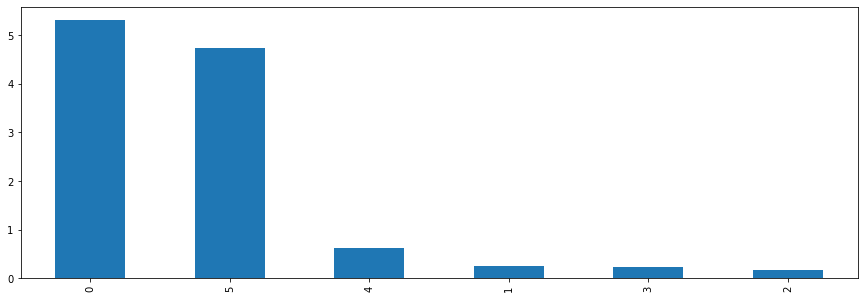

In [67]:
mutual_info_cls.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [68]:
from sklearn.feature_selection import SelectPercentile
selected_top_cols_2 = SelectPercentile(mutual_info_classif,percentile=20)
selected_top_cols_2.fit(cls_x_train,cls_y_train)
cls_x_train.columns[selected_top_cols_2.get_support()]

Index(['Functioning Day'], dtype='object')

#Regression

In [69]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression() 
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
lm.score(X_train, y_train)

0.6153928128139129

In [71]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Hour,3.406010
Temperature(°C),6.916734
Humidity(%),-2.332195
Wind speed (m/s),-0.260953
Visibility (10m),0.570229
Rainfall(mm),-1.725146
Snowfall (cm),-0.185959
Functioning Day,4.697829


In [72]:
predictions = lm.predict(X_test)

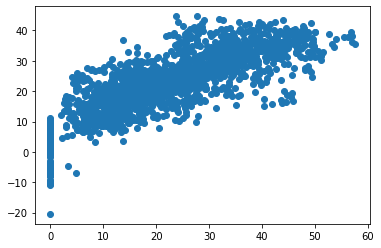

In [73]:
plt.scatter(y_test,predictions)

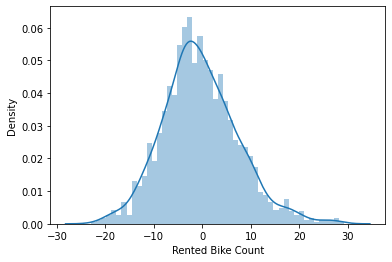

In [74]:
sns.distplot((y_test-predictions),bins=50);

In [116]:
def score(y_pred, y_true):
  '''
  Evaluates The Model With RMLSE
  '''
  error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
  score = 1 - error
  return score

In [75]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.110882776266527
MSE: 61.08842364920752
RMSE: 7.815908370062147


In [114]:
score(y_test,predictions)

0.8017627044032707

In [76]:
df = df.reset_index()

In [77]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test)**2,(predictions)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (predictions)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5254213679544518
Adjusted R2 :  0.5232431527758148


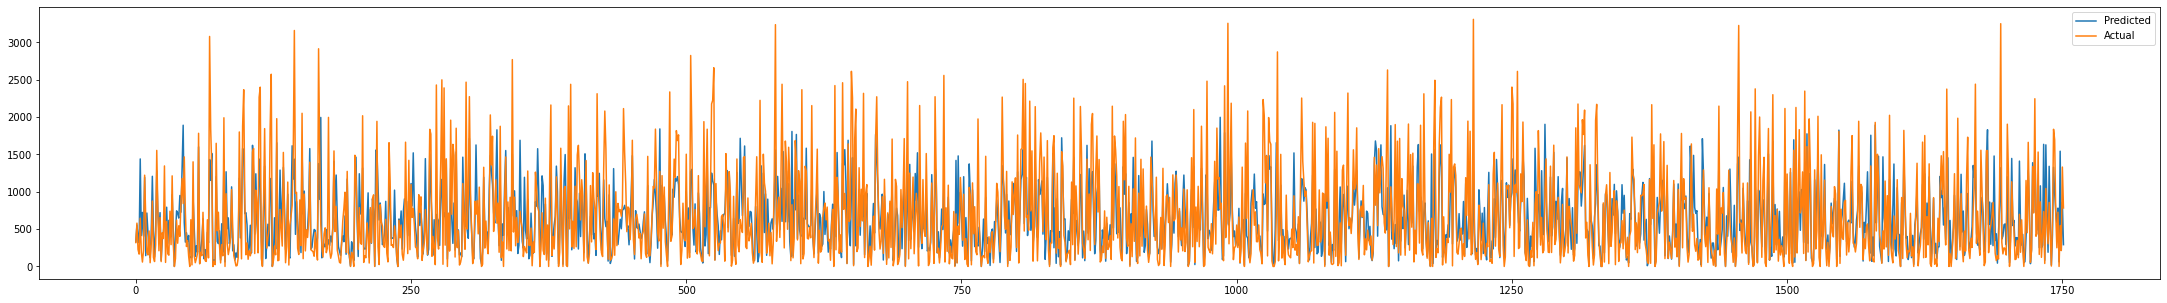

In [78]:
plt.figure(figsize=(38,5))
plt.plot((predictions)**2)
plt.plot(np.array(y_test)**2)
plt.legend(["Predicted","Actual"])
plt.show()

##Lasso Regression

In [79]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [80]:
lasso.score(X_train, y_train)

0.6148971222991938

In [81]:
y_pred_l = lasso.predict(X_test)

In [82]:
MSE  = mean_squared_error((y_test),(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 61.2415994849494
RMSE : 7.825701213626124
R2 : 0.6111305165126266
Adjusted R2 :  0.6093456881317323


###Cross Validation

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [85]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -59.440559542543944


In [86]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [112]:
score(y_test, y_pred_lasso)

0.801766262778182

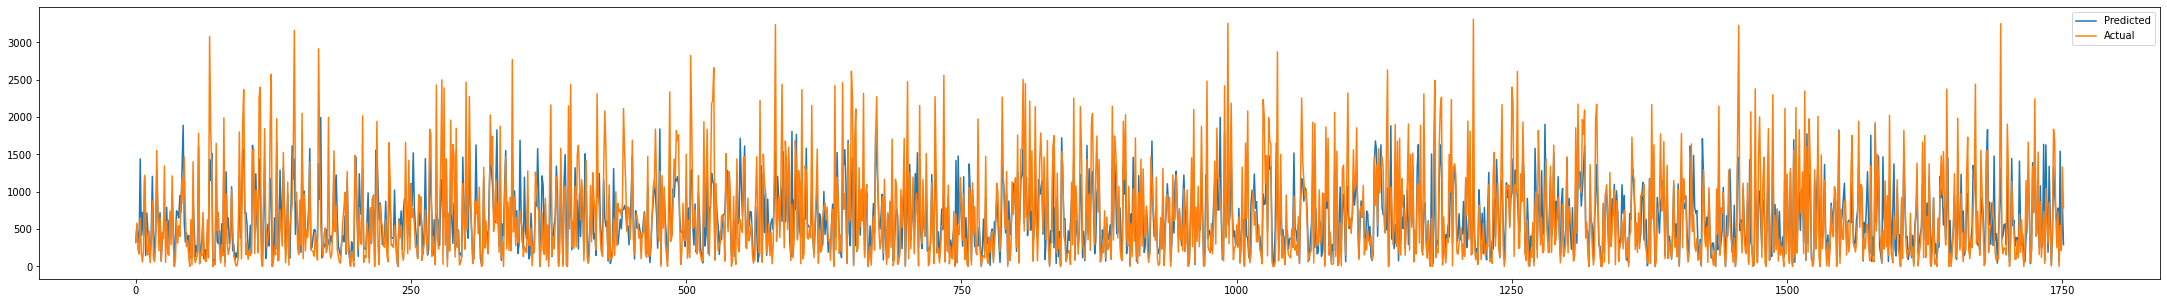

In [92]:
plt.figure(figsize=(38,5))
plt.plot((y_pred_lasso)**2)
plt.plot(np.array(y_test)**2)
plt.legend(["Predicted","Actual"])
plt.show()

In [88]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), 
                                     (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 61.08915102900203
RMSE : 7.8159549019299
R2 : 0.6120985276818527
Adjusted R2 :  0.6103181422667379


#Ridge Regression

In [93]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=0.1)

In [94]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [95]:
ridge.score(X_train, y_train)

0.6153928126837751

In [96]:
y_pred_r = ridge.predict(X_test)

In [97]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2,(y_pred_r)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred_r)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8.364135080477371e+111
RMSE : 9.145564542704497e+55
R2 : 0.5254202052777742
Adjusted R2 :  0.5232419847626981


## Cross Validation

In [98]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [99]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -59.44028756123726


In [100]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [102]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2,(y_pred_ridge)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2,(y_pred_ridge)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8.364135080477371e+111
RMSE : 9.145564542704497e+55
R2 : 0.525303994147545
Adjusted R2 :  0.5231252402480502


In [115]:
score(y_test,y_pred_ridge)

0.7974123946539936

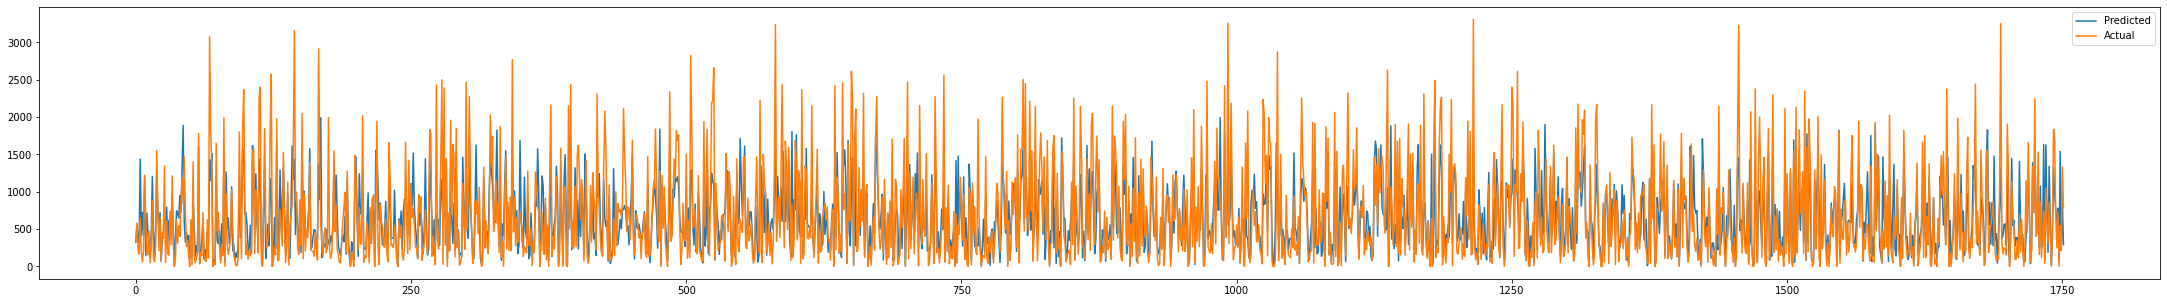

In [107]:
plt.figure(figsize=(38,5))
plt.plot((y_pred_ridge)**2)
plt.plot((np.array(y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()